In [32]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


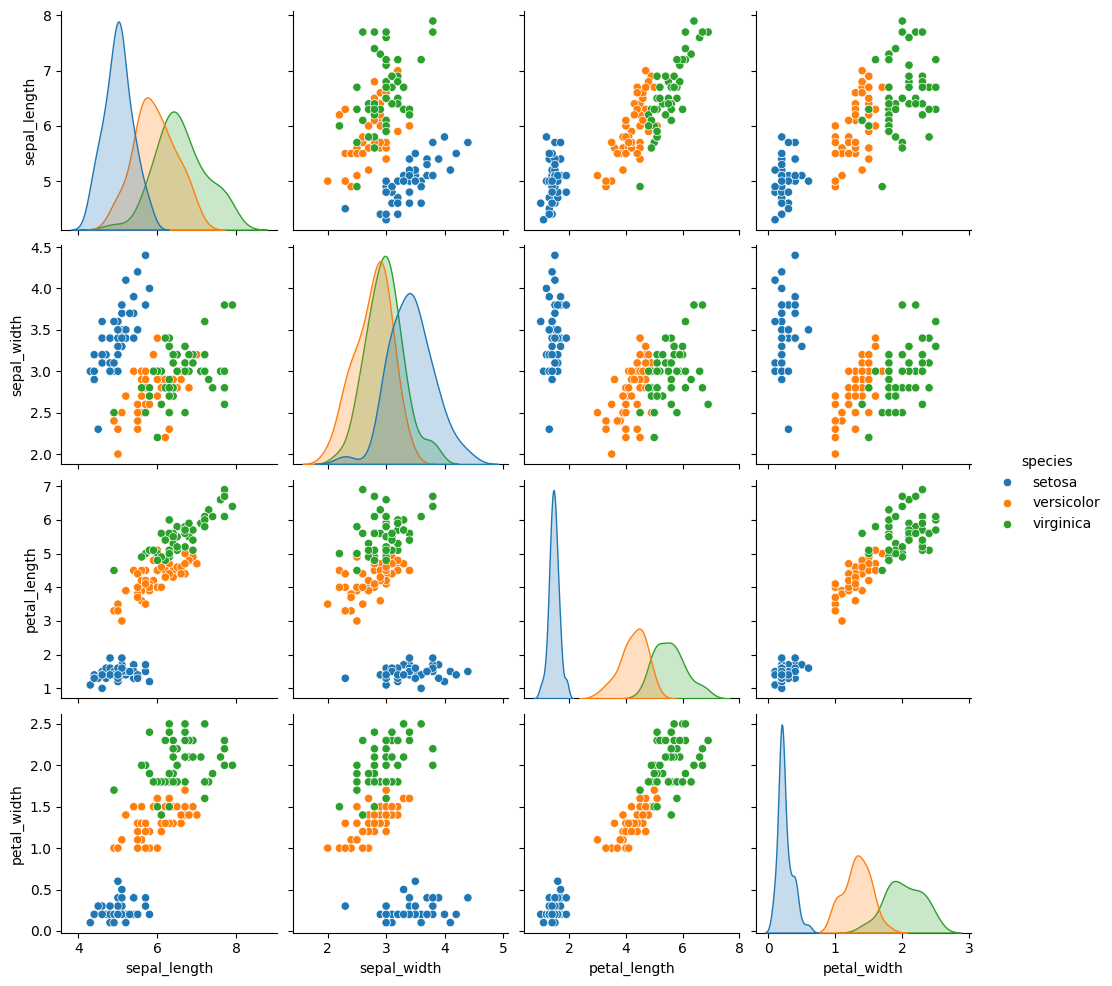

In [4]:
sns.pairplot(iris, hue="species")

In [5]:
data = torch.tensor(iris[iris.columns[0:4]].values).float()

labels = torch.zeros(len(data), dtype=torch.long)
# Zero is for setosa
labels[iris.species=="versicolor"] = 1
labels[iris.species=="virginica"] = 2
data

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0

In [6]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [7]:
ANNmulti_output = nn.Sequential(
    nn.Linear(4,64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 3),
    nn.ReLU(),
    nn.Linear(3,3)
)

lossfun = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(ANNmulti_output.parameters(), lr = 0.01)


In [8]:
epochs = 10000
losses = torch.zeros(epochs)
allAcc = torch.zeros(epochs)
for epoch in range(epochs):
    # Forward
    y_pred = ANNmulti_output(data)
    
    # compute loss
    loss = lossfun(y_pred, labels)
    losses[epoch] = loss
    
    # Backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    matches = torch.argmax(y_pred, axis=1) == labels
    matches = matches.float()
    acc = 100*torch.mean(matches)
    allAcc[epoch] = acc
    
acc
    

tensor(98.6667)

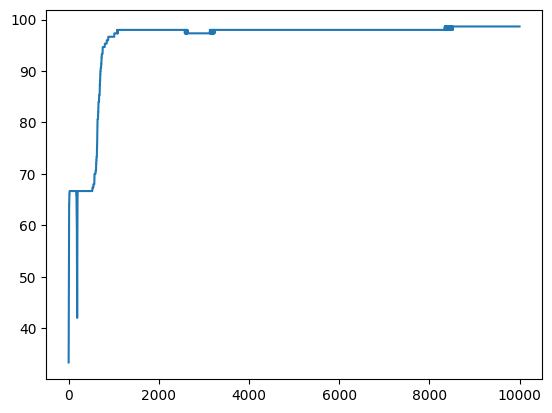

In [9]:
plt.plot(allAcc)

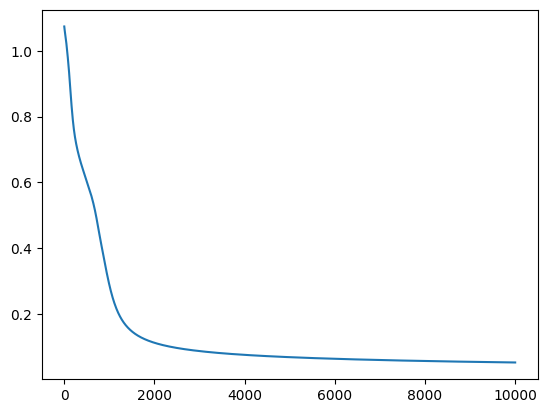

In [10]:
plt.plot(losses.detach())

In [11]:
y_pred = ANNmulti_output(data)
y_pred

tensor([[  3.0126,  -1.2793,  -1.7781],
        [  3.0126,  -1.2793,  -1.7781],
        [  3.0126,  -1.2793,  -1.7781],
        [  3.0126,  -1.2793,  -1.7781],
        [  3.0126,  -1.2793,  -1.7781],
        [  3.0126,  -1.2793,  -1.7781],
        [  3.0126,  -1.2793,  -1.7781],
        [  3.0126,  -1.2793,  -1.7781],
        [  3.0126,  -1.2793,  -1.7781],
        [  3.0126,  -1.2793,  -1.7781],
        [  3.0126,  -1.2793,  -1.7781],
        [  3.0126,  -1.2793,  -1.7781],
        [  3.0126,  -1.2793,  -1.7781],
        [  3.0126,  -1.2793,  -1.7781],
        [  3.0126,  -1.2793,  -1.7781],
        [  3.0126,  -1.2793,  -1.7781],
        [  3.0126,  -1.2793,  -1.7781],
        [  3.0126,  -1.2793,  -1.7781],
        [  3.0126,  -1.2793,  -1.7781],
        [  3.0126,  -1.2793,  -1.7781],
        [  3.0126,  -1.2793,  -1.7781],
        [  3.0126,  -1.2793,  -1.7781],
        [  3.0126,  -1.2793,  -1.7781],
        [  3.0122,  -1.2788,  -1.7781],
        [  3.0126,  -1.2793,  -1.7781],


In [12]:
y_pred.shape

torch.Size([150, 3])

In [13]:
sm = nn.Softmax(1)
y_probs = sm(y_pred)


In [14]:
y_probs

tensor([[9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8

In [15]:
ANNProbs = nn.Sequential(
    ANNmulti_output,
    nn.Softmax(dim=1)
)

ANNProbs(data)

tensor([[9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8.1280e-03],
        [9.7849e-01, 1.3385e-02, 8

In [16]:
ANNProbs

Sequential(
  (0): Sequential(
    (0): Linear(in_features=4, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=3, bias=True)
    (5): ReLU()
    (6): Linear(in_features=3, out_features=3, bias=True)
  )
  (1): Softmax(dim=1)
)

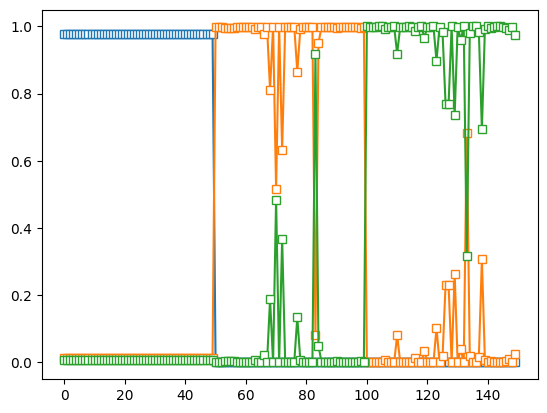

In [17]:
plt.plot(sm(y_pred.detach()), "s-", markerfacecolor="w")

In [18]:
def creatModel(neurons):
    ANN = nn.Sequential(
        nn.Linear(4,neurons),
        nn.ReLU(),
        nn.Linear(neurons,3),
    )
    lossfun = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(ANN.parameters(), lr=0.1)
    return ANN, lossfun, optimizer


def trainModel(ANN):
    epochs = 150
    losses = torch.zeros(epochs)
    allAcc = torch.zeros(epochs)

    for epoch in range(epochs):
        # Forward pass
        y_pred = ANN(data)
    
        # Loss Compute
        loss = lossfun(y_pred, labels)
        losses[epoch] = loss
    
        # Backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
        matches = torch.argmax(y_pred, axis=1) == labels
        matches = matches.float()
        acc = 100*torch.mean(matches)
        allAcc[epoch] = acc
        
    return acc, allAcc, losses
    

In [19]:
accs = []
for i in range(1,129):
    ANN, lossfun, optimizer = creatModel(i)
    acc, allAcc, _ = trainModel(ANN)
    accs.append(acc.detach())
    

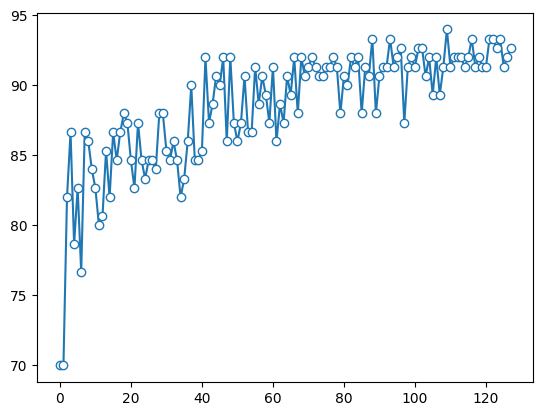

In [20]:
plt.plot(accs, "o-", markerfacecolor="w")

In [21]:
widenet = nn.Sequential(
    nn.Linear(2,4),
    nn.Linear(4,3),
)

deepnet = nn.Sequential(
    nn.Linear(2,2),
    nn.Linear(2,2),
    nn.Linear(2,3),
)

print(widenet)
print(" ")
print(deepnet)

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Linear(in_features=4, out_features=3, bias=True)
)
 
Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=2, bias=True)
  (2): Linear(in_features=2, out_features=3, bias=True)
)


In [22]:
for p in deepnet.named_parameters():
    print(p, "\n")

('0.weight', Parameter containing:
tensor([[ 0.2444,  0.6685],
        [-0.0614, -0.6627]], requires_grad=True)) 

('0.bias', Parameter containing:
tensor([-0.6777,  0.6520], requires_grad=True)) 

('1.weight', Parameter containing:
tensor([[ 0.1005, -0.2257],
        [-0.6418,  0.1463]], requires_grad=True)) 

('1.bias', Parameter containing:
tensor([-0.4677, -0.4936], requires_grad=True)) 

('2.weight', Parameter containing:
tensor([[ 0.0555, -0.2045],
        [ 0.3337, -0.7024],
        [-0.4820, -0.2022]], requires_grad=True)) 

('2.bias', Parameter containing:
tensor([-0.3066,  0.4513,  0.1668], requires_grad=True)) 



In [23]:
total_nodos = 0
for nome, camada in deepnet.named_modules():
        # Verifica se é uma camada Linear (Fully Connected)
        if isinstance(camada, nn.Linear):
            n_nodos = camada.out_features
            total_nodos += n_nodos
            print(f"Camada '{nome}': {n_nodos} nodos")
print("Total: ", total_nodos)

Camada '0': 2 nodos
Camada '1': 2 nodos
Camada '2': 3 nodos
Total:  7


In [24]:
num = 0
for i in deepnet.parameters():
    num += i.numel()
    print(i.numel())
    
print(num)

4
2
4
2
6
3
21


In [25]:
from torchsummary import summary
widenet = widenet.to("cuda")
summary(widenet, (1,2))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 4]              12
            Linear-2                 [-1, 1, 3]              15
Total params: 27
Trainable params: 27
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


## Sequencial vs Class

In [ ]:
annSeq = nn.Sequential(
    nn.Linear(4,64),
    nn.ReLU(),
    nn.Linear(64,3),
)


import torch.nn.functional as F

class annClass(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.input = nn.Linear(4,64)
        self.output = nn.Linear(64,3)
        
        
    def forward(self, x):
        
        x = F.relu(self.input(x))
        
        return self.output(x)

In [59]:
opa = annClass()
lossfun = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(opa.parameters(), lr = 0.01)

for epoch in range(200):
    y_pred = opa(data)
    
    loss = lossfun(y_pred, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    matches = torch.argmax(y_pred, axis=1) == labels
    matches = matches.float()
    acc = torch.mean(matches)
    print("Accuracy: ", acc)

Accuracy:  tensor(0.3333)
Accuracy:  tensor(0.3333)
Accuracy:  tensor(0.3200)
Accuracy:  tensor(0.1333)
Accuracy:  tensor(0.0467)
Accuracy:  tensor(0.1267)
Accuracy:  tensor(0.1600)
Accuracy:  tensor(0.1933)
Accuracy:  tensor(0.2333)
Accuracy:  tensor(0.2467)
Accuracy:  tensor(0.2600)
Accuracy:  tensor(0.2667)
Accuracy:  tensor(0.2800)
Accuracy:  tensor(0.3267)
Accuracy:  tensor(0.3800)
Accuracy:  tensor(0.4867)
Accuracy:  tensor(0.5800)
Accuracy:  tensor(0.6467)
Accuracy:  tensor(0.6600)
Accuracy:  tensor(0.6600)
Accuracy:  tensor(0.6667)
Accuracy:  tensor(0.6667)
Accuracy:  tensor(0.6667)
Accuracy:  tensor(0.6667)
Accuracy:  tensor(0.6667)
Accuracy:  tensor(0.6667)
Accuracy:  tensor(0.6667)
Accuracy:  tensor(0.6667)
Accuracy:  tensor(0.6667)
Accuracy:  tensor(0.6667)
Accuracy:  tensor(0.6667)
Accuracy:  tensor(0.6667)
Accuracy:  tensor(0.6667)
Accuracy:  tensor(0.6667)
Accuracy:  tensor(0.6667)
Accuracy:  tensor(0.6667)
Accuracy:  tensor(0.6667)
Accuracy:  tensor(0.6733)
Accuracy:  t

# Test depth vs breath

In [60]:
class ANNiris(nn.Module):
    def __init__(self,nUnits, nLayers):
        super().__init__()
        
        self.layers = nn.ModuleDict()
        self.nLayers = nLayers
        
        self.layers['inputs'] = nn.Linear(4, nUnits)
        
        for i in range(nLayers):
            self.layers[f'hidden{i}'] = nn.Linear(nUnits, nUnits)
            
        self.layers["output"] = nn.Linear(nUnits, 3)
    
    def forward(self, x):
        x = F.relu(self.layers["inputs"](x))
        
        for layer in range(self.nLayers):
            x = F.relu(self.layers[f"hidden{layer}"](x))
            
        return self.layers["output"](x)

In [61]:
net = ANNiris(12,6)
net

ANNiris(
  (layers): ModuleDict(
    (inputs): Linear(in_features=4, out_features=12, bias=True)
    (hidden0): Linear(in_features=12, out_features=12, bias=True)
    (hidden1): Linear(in_features=12, out_features=12, bias=True)
    (hidden2): Linear(in_features=12, out_features=12, bias=True)
    (hidden3): Linear(in_features=12, out_features=12, bias=True)
    (hidden4): Linear(in_features=12, out_features=12, bias=True)
    (hidden5): Linear(in_features=12, out_features=12, bias=True)
    (output): Linear(in_features=12, out_features=3, bias=True)
  )
)

In [62]:
tmpx = torch.randn(10,4)

y = net(tmpx)

print(y.shape)
print("\n", y)

torch.Size([10, 3])

 tensor([[ 0.2193,  0.2705, -0.2405],
        [ 0.2199,  0.2707, -0.2397],
        [ 0.2198,  0.2705, -0.2415],
        [ 0.2209,  0.2705, -0.2384],
        [ 0.2199,  0.2704, -0.2395],
        [ 0.2191,  0.2707, -0.2401],
        [ 0.2239,  0.2693, -0.2367],
        [ 0.2188,  0.2706, -0.2408],
        [ 0.2202,  0.2704, -0.2393],
        [ 0.2193,  0.2706, -0.2401]], grad_fn=<AddmmBackward0>)


In [84]:
nLayers = range(1,6)
nUnits = np.arange(4,200,3)


allAcc = torch.zeros((len(nUnits), len(nLayers)))
allParams = torch.zeros((len(nUnits), len(nLayers)))



for layer in range(len(nLayers)):
    for neuron in range(len(nUnits)):
        ann = ANNiris(nUnits[neuron], nLayers[layer])
        lossfun = nn.CrossEntropyLoss()
        optimizer = torch.optim.SGD(ann.parameters(), lr=.01)
        for epoch in range(250):
            #forward
            y_pred = ann(data)
            
            #compute loss
            loss = lossfun(y_pred, labels)
            
            # Backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            matches = torch.argmax(y_pred, axis=1) == labels
            matches = matches.float()
            acc = torch.mean(matches)
            
            allAcc[neuron, layer] = acc
            
            nParams = sum(p.numel() for p in ann.parameters() if p.requires_grad)
            allParams[neuron, layer] = nParams

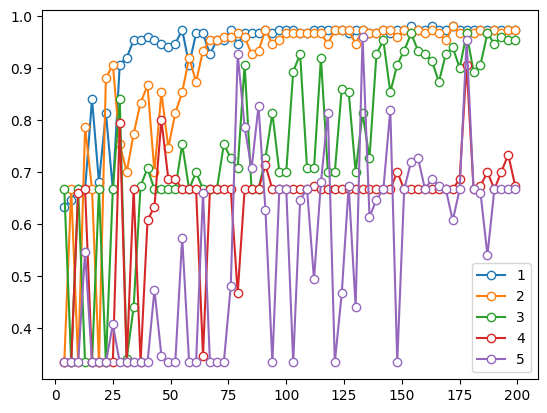

In [85]:
plt.plot(nUnits, allAcc, "o-", markerfacecolor="w")
plt.legend(nLayers)

Text(0.5, 1.0, 'Correlation: r=0.049')

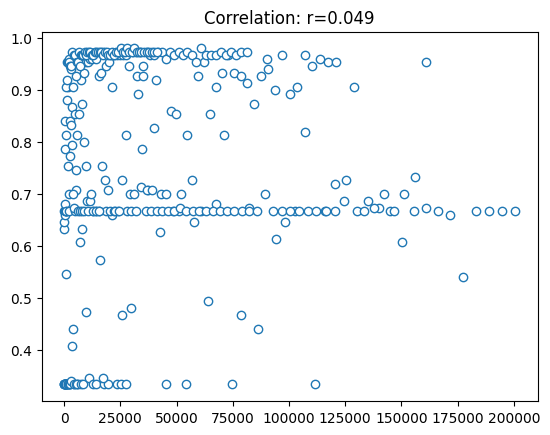

In [87]:
x = allParams.flatten()
y = allAcc.flatten()

r = np.corrcoef(x,y)[0,1]

plt.plot(x,y, "o", markerfacecolor="w")
plt.title("Correlation: r=" + str(np.round(r,3)))